## Chapter 4: [Spectroscopy](CH4-Spectroscopy.ipynb)

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of Spectrum Images


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes



## Content

Plotting, Interacting and Quantifying Spectrum Image data

Please cite for core-loss quantification:

[M. Tian et  al. *Measuring the areal density of nanomaterials by electron energy-loss spectroscopy*
Ultramicroscopy Volume 196, 2019, pages 154-160](https://doi.org/10.1016/j.ultramic.2018.10.009)

as a reference of this quantification method.

## First we import the relevant packages

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

from scipy.ndimage.filters import gaussian_filter

# import pyTEMlib packages
import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library
import pyTEMlib.EELS_tools  as eels 

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
windows
pyTEM version:  0.7.2019.9


# Load and plot a spectrum

As an example we load the spectrum **1EELS Acquire (high-loss).dm3** from the *example data* folder.

Please see [Working with Spectrum Images](CH4-Working_with_Spectrum_Images.ipynb) for details on storage and plotting.

Channel_000 :  2-EELS Spectrum Image


Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


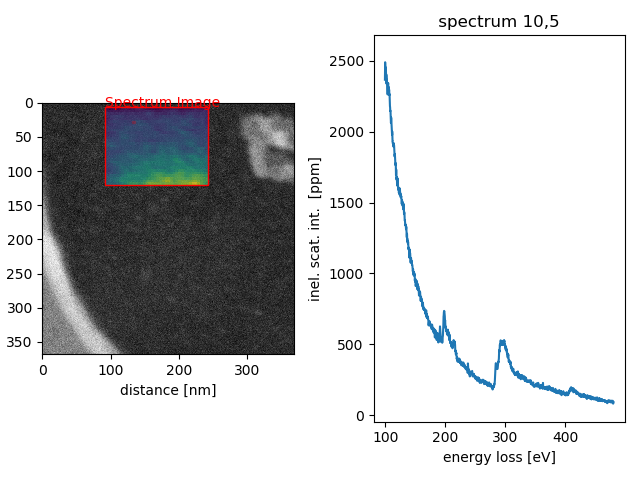

In [2]:
# If a file is open, close it
try:
    h5_file.close()
except:
    pass
# Load file
h5_file = ft.h5open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
measurement_group = h5_file['Measurement_000']


for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')    
        
if current_channel['data_type'][()] == 'spectrum_image':
    SI_plot= eels.interactive_spectrum_image(current_channel, horizontal = True)
    
else:
    print('NOT what we want here, please select a spectrum image ')
    ft.h5_plot(current_channel)
   
    

In [157]:
print(SI_plot.tags['zero_loss_fit_width'])
SI_plot.tags['zero_loss_fit_width']= 2.
print(SI_plot.analysis)


1.5
['fit_zero_loss']


In [161]:
SI_plot.do_All(verbose = True)

 row: 0
 row: 1
 row: 2
 row: 3
 row: 4
 row: 5
 row: 6
 row: 7
 row: 8
 row: 9
 row: 10
 row: 11
 row: 12
 row: 13
 row: 14
 row: 15
 row: 16
 row: 17
 row: 18
 row: 19


<IPython.core.display.Javascript object>


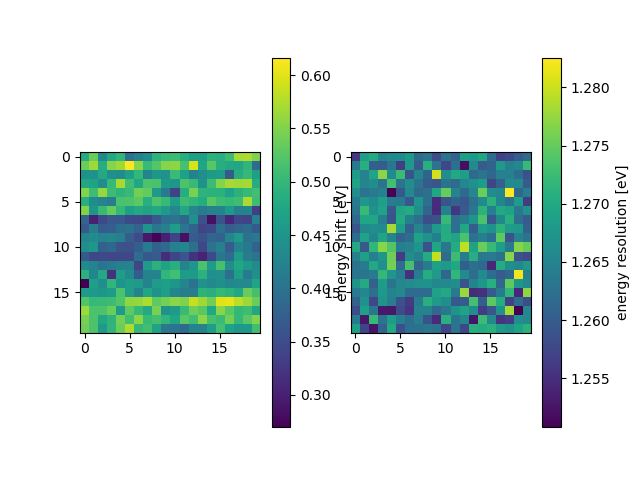

1.2656398056715314


In [162]:
spectrum_tags = SI_plot.tags['spectra']

shift_array = np.empty(SI_plot.tags['cube'].shape[0:2])
FWHM_array = np.empty(SI_plot.tags['cube'].shape[0:2])
for x in range(shift_array.shape[0]):
    for y in range(shift_array.shape[1]):
        shift_array[x,y] = spectrum_tags[f'{x}-{y}']['deltaE']
        FWHM_array[x,y] = spectrum_tags[f'{x}-{y}']['FWHM']

fig = plt.figure()
ax1=plt.subplot(1, 2, 1)
im = ax1.imshow(shift_array.T, origin= 'upper');
color_bar = fig.colorbar(im, ax=ax1)
color_bar.set_label('energy shift [eV]')
ax2=plt.subplot(1, 2, 2)
im2 = ax2.imshow(np.abs(FWHM_array.T), origin= 'upper', );
color_bar2 = fig.colorbar(im2, ax=ax2)
color_bar2.set_label('energy resolution [eV]')

print(spectrum_tags[f'{16}-{7}']['FWHM'])


## Add survey image to file
If you have not done so before, add the survey image to the dataset (measurement group).

In [3]:
SI_channel = ft.h5add_channels(h5_file,current_channel,'survey image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')   
        

Channel_000 :  2-EELS Spectrum Image
Channel_001 :  2-SI Survey Image


## Add Z-contrast image
If you have not done so before, add the survey image to the dataset (measurement group).

In [4]:
Z_channel = ft.h5add_channels(h5_file,current_channel,'Z-contrast image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ') 

Channel_000 :  2-EELS Spectrum Image
Channel_001 :  2-SI Survey Image
Channel_002 :  2-Analog


## Add Survey Image to plot above



In [5]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_data() 

## set view port 
#SI_plot.ax1.set_xlim(0,90)
#SI_plot.ax1.set_ylim(60,20)


## Overlay Z-contrast image on survey image at plot above

In [38]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


## set view port 
#SI_plot.ax1.set_xlim(0,90)
#SI_plot.ax1.set_ylim(60,20)


In [3]:
SI_plot.set_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])

## Probability scale of y-axis

We need to know the total amount of electrons involved in the EELS spectrum 

There are three possibilities:
- the intensity of the low loss will give us the counts per acquisition time
- the intensity of the beam in an image (i.e. "Ronchigram" of vacuum)
- a direct measurement of the incident beam current

Here we got the low-loss spectrum. For the example please load **1EELS Acquire (low-loss).dm3** from the *example data* folder.

In [ ]:
ll_channel = ft.h5_add_channel(h5_file,current_channel,'LL',filename=None)

# get dictionary from current channel in pyUSID file
LLspectrum_tags = ft.h5_get_dictionary(ll_channel)

or an image of the Ronchigram

In [6]:
ll_channel = ft.h5_add_channel(h5_file,current_channel,'image',filename=None)

# get dictionary from current channel in pyUSID file
LLspectrum_tags = ft.h5_get_dictionary(ll_channel)


In [7]:


print(f"{LLspectrum_tags['data'].sum():.0f} counts in  {LLspectrum_tags['integration_time']:.2f}sec")
I0 = LLspectrum_tags['data'].sum()/LLspectrum_tags['integration_time']
print(f"integration time for spectrum was {tags['integration_time']:.2f} s ")

I0 = LLspectrum_tags['data'].sum()/LLspectrum_tags['integration_time']*tags['integration_time']
print(f"incident beam current of core--loss is {I0:.0f} counts")

if 'incident_beam_current_counts' in current_channel:
    current_channel['incident_beam_current_counts'][()] = I0
    tags['intentsity_scale_ppm'] = 1e6/I0
    current_channel['intentsity_scale_ppm'][()] = tags['intentsity_scale_ppm']
else:
    current_channel['incident_beam_current_counts'] = I0
    tags['intentsity_scale_ppm'] = 1e6/I0
    current_channel['intentsity_scale_ppm'] = tags['intentsity_scale_ppm']

    
out_tags ={}
out_tags['intentsity_scale_ppm'] = tags['intentsity_scale_ppm']
if 'intentsity_scale_ppm' in current_channel:
    current_channel['intentsity_scale_ppm'][()] = tags['intentsity_scale_ppm']
else:
    current_channel['intentsity_scale_ppm'] = tags['intentsity_scale_ppm']


KeyError: 'integration_time'

In [69]:
print(LLspectrum_tags.keys())

dict_keys(['aberrations', 'acceleration_voltage', 'camera_length', 'image_type', 'time_last_modified', 'title', 'data_type', 'data', 'spatial_size_x', 'spatial_size_y', 'spatial_scale_x', 'spatial_scale_y', 'FOV_x', 'FOV_y', 'extent', 'spatial_units', 'integration_time'])


dict_keys(['aberrations', 'acceleration_voltage', 'camera_length', 'image_type', 'time_last_modified', 'title', 'data_type', 'data', 'spatial_size_x', 'spatial_size_y', 'spatial_scale_x', 'spatial_scale_y', 'FOV_x', 'FOV_y', 'extent', 'spatial_units', 'integration_time'])
-709972997
16469896187.0 25874416.0 0.0015710126952969603
16469896187 counts in  0.50sec
integration time for spectrum was 0.50 s 
incident beam current of core--loss is 16469896187 counts


<IPython.core.display.Javascript object>


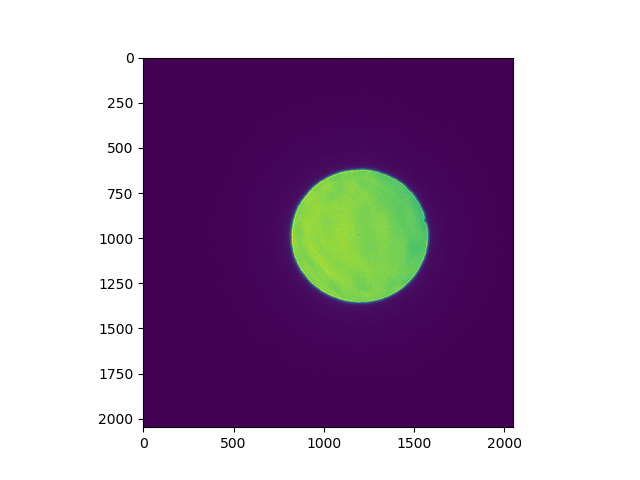

0 6.071683686684795e-05


In [70]:
tags = SI_plot.tags.copy()

print(LLspectrum_tags.keys())
print(LLspectrum_tags['data'].sum())
data = np.array(LLspectrum_tags['data'], dtype = float)

print(data.sum(),tags['data'].sum(), tags['data'].sum()/data.sum())
LLspectrum_tags['integration_time'] = .5
print(f"{data.sum():.0f} counts in  {LLspectrum_tags['integration_time']:.2f}sec")

print(f"integration time for spectrum was {tags['integration_time']:.2f} s ")

I0 = data.sum()/LLspectrum_tags['integration_time']*tags['integration_time']
print(f"incident beam current of core--loss is {I0:.0f} counts")
plt.figure()
plt.imshow(LLspectrum_tags['data'])
tags['intentsity_scale_ppm'] = 1e6/I0
      
out_tags ={}
out_tags['intentsity_scale_ppm'] = tags['intentsity_scale_ppm']
if 'intentsity_scale_ppm' in current_channel:
    current_channel['intentsity_scale_ppm'][()] = tags['intentsity_scale_ppm']
else:
    current_channel['intentsity_scale_ppm'] = tags['intentsity_scale_ppm']
print(current_channel['intentsity_scale_ppm'][()],tags['intentsity_scale_ppm'])

dict_keys(['aberrations', 'acceleration_voltage', 'camera_length', 'image_type', 'time_last_modified', 'title', 'data_type', 'data', 'spatial_size_x', 'spatial_size_y', 'spatial_scale_x', 'spatial_scale_y', 'FOV_x', 'FOV_y', 'extent', 'spatial_units', 'integration_time'])


<IPython.core.display.Javascript object>


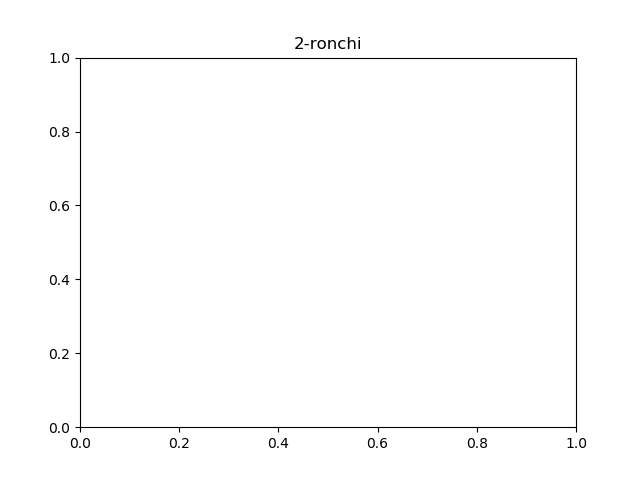

KeyError: 'energy_scale'

In [10]:
print(LLspectrum_tags.keys())

plt.figure()
plt.title(LLspectrum_tags['title'])
plt.plot(LLspectrum_tags['energy_scale'] , LLspectrum_tags['data'] );
plt.xlabel('energy loss [eV]')
plt.ylabel('probability [ppm]');


## Prepare Quantification

Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


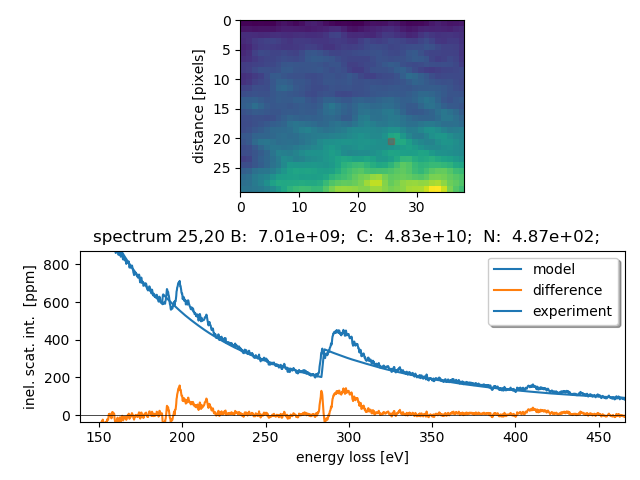

In [71]:
tags = SI_plot.tags.copy()
SI_plot2= eels.interactive_spectrum_image(tags, horizontal = False)

# Set edges to be fitted
edges_present = ['B-K1', 'C-K1','N-K1']
SI_plot2.tags['edges_present'] = edges_present

## ACTIVATE THE FITTING
SI_plot.analysis= 'fit_quantification'
SI_plot2.set_legend(False)    

## Activate the regions selection tool.

In [72]:
## define the fitting regions
edges = eels.make_edges(edges_present, tags['energy_scale'], tags['acceleration_voltage'], tags['collection_angle'])

regions = eels.Region_Selector(SI_plot2.ax2)
for key in edges:
    regions.set_regions(str(key),edges[key]['onset']-edges[key]['start_exclude'], edges[key]['start_exclude']+edges[key]['end_exclude'])                               
regions.set_regions('fit region',tags['energy_scale'][100], tags['energy_scale'][-1]-tags['energy_scale'][100])


## After adjusting the regions, remove the selector and make legend visible

In [73]:
SI_plot2.set_legend(True)
region_tags = regions.get_regions()
SI_plot2.tags['region_tags'] = region_tags
tags2 = SI_plot2.tags.copy()
try:
    regions.disconnect()
    del regions
except:
    pass

## You can  adjust the previous slections 

In [26]:
try:
    region_tags = regions.get_regions()
    regions.disconnect()
    del regions
except:
    pass

regions = eels.Region_Selector(SI_plot2.ax2)
print(region_tags['1'].keys())
for key in region_tags:
    regions.set_regions(str(key),region_tags[key]['start_x'], region_tags[key]['width_x'])                               


dict_keys(['start_x', 'width_x'])


The result of the selected spectrum can be seen here

In [88]:
x = SI_plot2.x
y = SI_plot2.y
print(x,y)

print(SI_plot2.tags['spectra'][f'{x}-{y}']['edges'].keys())
fit_parameter = SI_plot2.tags['spectra'][f'{x}-{y}']['edges']['model']['fit_parameter']

print(x,y, fit_parameter)

print('B areal density : ', fit_parameter[3])
print('B areal layer : ', fit_parameter[3]/ 16)
print('N areal density : ', fit_parameter[5])
print('N areal layer : ', fit_parameter[5]/ 16)


25 20
dict_keys(['1', '2', '3', 'model'])
25 20 [ 7.00702377e+09  4.83302162e+10  4.86896394e+02  3.36451440e+02
  3.36451440e+02  3.36451440e+02 -6.49594900e+01  1.43508190e-01
  1.33029143e-05]
B areal density :  336.4514404296875
B areal layer :  21.02821502685547
N areal density :  336.4514404296875
N areal layer :  21.02821502685547


In [65]:
SI_plot2.cube = np.swapaxes(SI_plot2.cube, 0,1)
print(SI_plot2.cube.shape)

(38, 29, 2048)


## Whole Spectrum Image Analysis

Now we do the all the spectra, with the same setting as selected above. 
Set the verbose variable to **True** to see the progress.

In [61]:
SI_plot2.do_All(verbose = True)

 row: 0
 row: 1


C:\Users\gdusc\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 2000.
  warnings.warn(errors[info][0], RuntimeWarning)


 row: 2
 row: 3
 row: 4
 row: 5
 row: 6
 row: 7
 row: 8
 row: 9
 row: 10
 row: 11
 row: 12
 row: 13
 row: 14
 row: 15
 row: 16
 row: 17
 row: 18
 row: 19
 row: 20
 row: 21
 row: 22
 row: 23
 row: 24
 row: 25
 row: 26
 row: 27
 row: 28
 row: 29
 row: 30
 row: 31
 row: 32
 row: 33
 row: 34
 row: 35
 row: 36
 row: 37


## Plotting the results:

The results are in the individual spectrum dictionary: 

*SI_plot2.tags['spectra'][f'{x}-{y}']*

The compositional results are in the edge dictionary. Each edge has its own sub-dictionary. The areal_density is the result of the compositional fit. 


In [66]:

y = SI_plot2.x
x = SI_plot2.y
print('spectrum ', x,y)
print(SI_plot2.tags['spectra'][f'{x}-{y}']['edges']['2'].keys())
print(SI_plot2.tags['spectra'][f'{x}-{y}']['edges']['2']['element'])
print('areal_density: ',SI_plot2.tags['spectra'][f'{x}-{y}']['edges']['1']['areal_density'])

spectrum  29 0
dict_keys(['Z', 'symmetry', 'element', 'chemcial_shift', 'original_onset', 'onset', 'start_exclude', 'end_exclude', 'data', 'areal_density'])
C
areal_density:  3759436780.420196


So we collect the areal densities of the different edges in numpy arrays.

The arrays are stored in a dictionary *results_dictionary* and then we plot those arrays.


<IPython.core.display.Javascript object>


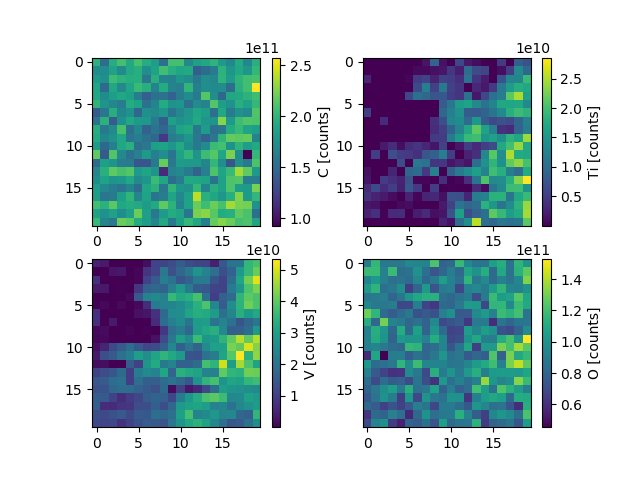

In [124]:

results_dictionary = {}

# we are only after the edges so it does not matter which spectrum we use
for key in  SI_plot2.tags['spectra']['0-0']['edges']: 
    
    if key.isdigit():  # only edges have numbers in that dictionary
        results_dictionary[key] = {} # make new dictionary
        # store the additional data like element and what edge
        results_dictionary[key]['element'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['element']
        results_dictionary[key]['Z'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['Z']
        results_dictionary[key]['onset'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['onset']
        results_dictionary[key]['symmetry'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['symmetry']
        
        # intitalize data array
        results_dictionary[key]['data'] = np.empty(SI_plot.tags['cube'].shape[0:2])
        # go through all spectra and fill data array pixel.
        for x in range(results_dictionary[key]['data'].shape[0]):
            for y in range(results_dictionary[key]['data'].shape[1]):
                results_dictionary[key]['data'][x,y] = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['areal_density']

## plot
ax = []; im= []; color_bars = []
fig = plt.figure()
titles = ['Ti [counts]', 'V [counts]', 'O [counts]', 'O/(Ti+V)  [rel.]',]
for key in results_dictionary:        
    ax.append(plt.subplot(2, 2, int(key)))
    im.append(ax[-1].imshow(results_dictionary[key]['data'].T, origin= 'upper'));
    color_bars.append(fig.colorbar(im[-1], ax=ax[-1]))
    color_bars[-1].set_label(results_dictionary[key]['element']+' [counts]')
#im[3].set_clim(vmax=8)

## Intensity to Probability Calibration

 We need to calibrate the number of counts with the integration time of the spectrum.

<IPython.core.display.Javascript object>


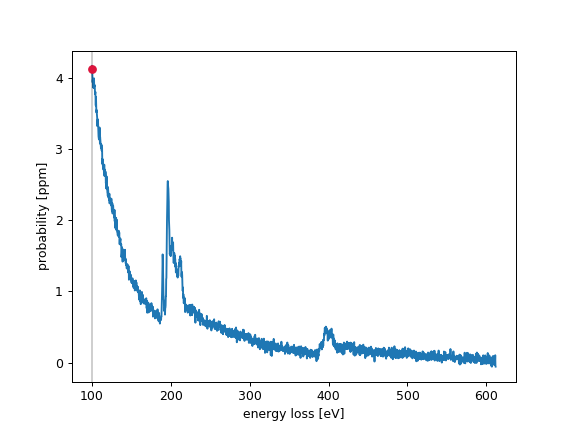

In [3]:


spectrum = tags['data']*current_channel['intentsity_scale_ppm'][()]
plt.figure()
plt.plot(tags['energy_scale'], spectrum)
plt.xlabel('energy loss [eV]')
plt.ylabel('probability [ppm]');


## Which elements are present

To determine which elements are present we add a cursor to the above plot (see [Working with Cross-Sections](CH4-Working_with_X-Sections.ipynb) for details) and with a left (right) mouse-click, we will get the major (all) edges in the vincinity of the cursor.

In the example we note that the N-K edge of this boron nitride sample is not at 400keV. We have to adjust the energy-scale. <br>(THIS SHOULD NOT HAPPEN IN NORMAL SPECTRA AND IS FOR DEMONSTRATION ONLY)

In [4]:
maximal_chemical_shift = 5
cursor = eels.EdgesatCursor(plt.gca(), tags['energy_scale'],spectrum,maximal_chemical_shift)


Let's correct the energy scale of the example spectrum.

Again a shift of the energy scale is normal but not a discripancy of the dispersion.

## Declaration of Edges
Here we declare which ionization-edges are present. Please make sure that the energy scale is correct!!!



<IPython.core.display.Javascript object>


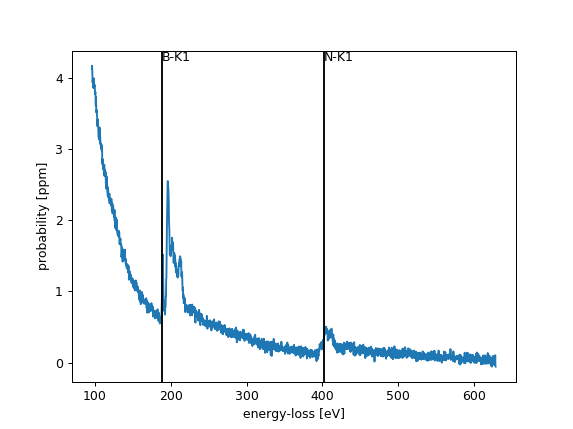

In [5]:
## Input
edges_present = ['B-K','N-K']


tags['energy_scale'] = energy_scale_orig*1.04-8
energy_scale = tags['energy_scale']


edges = eels.make_edges(edges_present, energy_scale, tags['acceleration_voltage'], tags['collection_angle'])

plt.figure()
plt.plot(energy_scale, spectrum, label='spectrum')
plt.xlabel('energy-loss [eV]')
plt.ylabel('probability [ppm]');  

plot_edges= []
for key in edges:
    plot_edges.append( eels.elemental_edges(plt.gca(), edges[key]['Z']))

## Preparing the fitting mask

Our theoretical cross sections do not include any solid state effects (band structure) and so the fine structure at the onset of the spectra must be omitted in a quantification.

These parts of the spectrum will be simply set to zero. We plot the masked spectrum that will be evaluated.

<IPython.core.display.Javascript object>


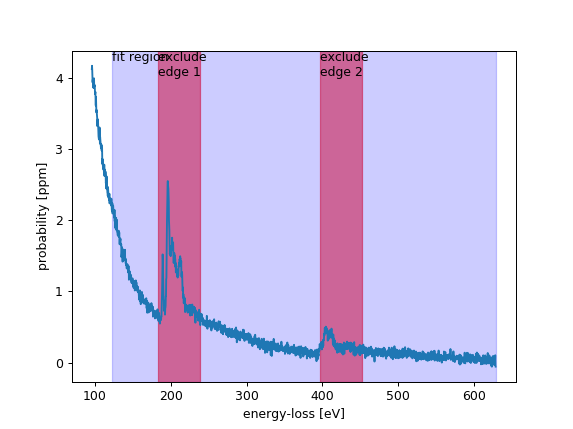

In [8]:
plt.figure()
plt.plot(energy_scale, spectrum, label='spectrum')
plt.xlabel('energy-loss [eV]')
plt.ylabel('probability [ppm]');  

regions = eels.Region_Selector(plt.gca())

for key in edges:
    regions.set_regions(str(key),edges[key]['onset']-edges[key]['start_exclude'], edges[key]['start_exclude']+edges[key]['end_exclude'])
                                  
regions.set_regions('fit region',energy_scale[100], tags['energy_scale'][-1]-energy_scale[100])



## The Fit

The function **model** just sums the weighted cross-sections and the background.

The background consists of the power-lawbackground before plus a polynomial component allowing for *a variation of the exponent $r$ of the power-law*.

The least square fit is weighted by the noise according to Poison statistic $\sqrt{I(\Delta E)}$.



In [9]:
region_tags = regions.get_regions()
edges = eels.fit_edges(spectrum, energy_scale, region_tags, edges)


print(f"{edges['1']['element']}/{edges['2']['element']} ratio is {edges['1']['areal_density']/edges['2']['areal_density']:.3f}")

#the B atom areal density of a single layer of h-BN (18.2 nm−2) 
for key in edges:
    if key.isdigit():
        print(f"{edges[key]['element']} ({edges[key]['Z']}) areal density is {edges[key]['areal_density']:.0f} atoms per square nm, which equates {abs(edges[key]['areal_density'])/18.2:.1f} atomic layers")


B/N ratio is 1.115
B (5) areal density is 98 atoms per square nm, which equates 5.4 atomic layers
N (7) areal density is 88 atoms per square nm, which equates 4.8 atomic layers


## Plotting of the fit


<IPython.core.display.Javascript object>


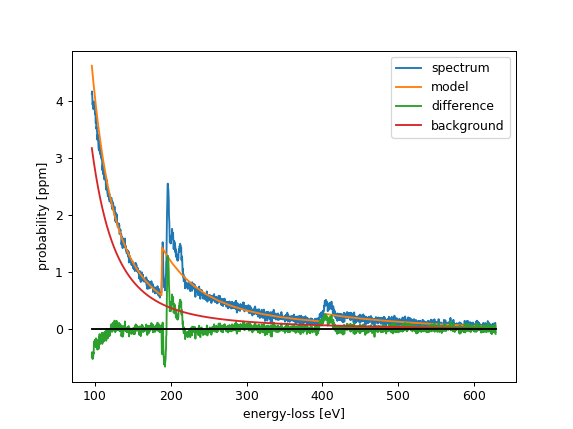

In [10]:

plt.figure()
plt.plot(energy_scale, spectrum, label='spectrum')
plt.plot(energy_scale,edges['model']['spectrum']*1e6, label='model')
plt.plot(energy_scale,spectrum-edges['model']['spectrum']*1e6, label='difference')
plt.plot(energy_scale,edges['model']['background']*1e6, label='background')
plt.plot([energy_scale[0],energy_scale[-1]],[0,0],c='black')

plt.xlabel('energy-loss [eV]')
plt.ylabel('probability [ppm]')
plt.legend();

## Dictionary for Log of Fitting Results

In [11]:
out_tags = {}
for key1 in edges:
    if key1.isdigit():
        for key2 in edges[key1]:
            out_tags[f"edge_{key1}_{key2}"] = edges[key1][key2]
    else:
        for key2 in edges[key1]:
            out_tags[f"{key1}_{key2}"] = edges[key1][key2]

out_tags['monolayer']= 18.2 #atoms/nm^2
out_tags['X_section_unit'] = 'atoms/nm$^2$'

In [12]:
print(out_tags.keys())

dict_keys(['edge_1_Z', 'edge_1_symmetry', 'edge_1_element', 'edge_1_chemcial_shift', 'edge_1_original_onset', 'edge_1_onset', 'edge_1_start_exclude', 'edge_1_end_exclude', 'edge_1_data', 'edge_1_areal_density', 'edge_2_Z', 'edge_2_symmetry', 'edge_2_element', 'edge_2_chemcial_shift', 'edge_2_original_onset', 'edge_2_onset', 'edge_2_start_exclude', 'edge_2_end_exclude', 'edge_2_data', 'edge_2_areal_density', 'model_background', 'model_background-poly_1', 'model_background-poly_2', 'model_background-A', 'model_background-r', 'model_spectrum', 'model_blurred', 'model_mask', 'model_fit_parameter', 'model_fit_area_start', 'model_fit_area_end', 'monolayer', 'X_section_unit'])


## Log Results

In [13]:
log_group = ft.h5_add_Log(current_channel, name='Xsection_fit')
ft.h5_add_Data2Log(log_group,  out_tags)

## Check on File Content

In [14]:
import pyUSID as usid 
usid.hdf_utils.print_tree(h5_file)


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ X_section_unit
      ├ _Xsection_fit
      ├ edge_1_Z
      ├ edge_1_areal_density
      ├ edge_1_chemcial_shift
      ├ edge_1_data
      ├ edge_1_element
      ├ edge_1_end_exclude
      ├ edge_1_onset
      ├ edge_1_original_onset
      ├ edge_1_start_exclude
      ├ edge_1_symmetry
      ├ edge_2_Z
      ├ edge_2_areal_density
      ├ edge_2_chemcial_shift
      ├ edge_2_data
      ├ edge_2_element
      ├ edge_2_end_exclude
      ├ edge_2_onset
      ├ edge_2_original_onset
      ├ edge_2_start_exclude
      ├ edge_2_symmetry
      ├ model_background
      ├ model_background-A
      ├ model_background-poly_1
      ├ model_background-poly_2
      ├ model_background-r
      ├ model_blurred
      ├ model_fit_area_end
      ├ model_fit_area_start
      ├ model_fit_parameter
      ├ model_mask
      ├ model_spectrum
      ├ monolayer
      ├ time_stamp
      ├ title
    ├ Position_

# Close File
File needs to be closed to be used with other notebooks

In [15]:
h5_file.close()

## Back: [Calculating Dielectric Function II: Silicon](DielectricDFT2.ipynb)
## Next:  [ELNES](ELNES.ipynb)

## Chapter 4: [Spectroscopy](Spectroscopy.ipynb)
## Index: [Index](Analysis_of_Transmission_Electron_Microscope_Data.ipynb)